## IMPORT LIBRARY

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## DATA READ

In [201]:
data=pd.read_csv("train.csv",skiprows=range(1,35),nrows=1)
print(data.head(10))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      2       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  

[1 rows x 785 columns]


### DROP UNNECESSARY ATTRIBUTE

In [202]:
data=data.drop('label',axis=1)

## CONVERT 1-D DATA TO ARRAY AND THEN CONVERT INTO MATRIX

In [203]:
a=[]
for i in tqdm(data):
    a.append(data[i])
a=np.array(a)
a=a.reshape(28,28)
a

784it [00:00, 17866.43it/s]                                                                                            


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## VISUALIZE MNIST WORD

Text(0.5, 1.0, 'Real')

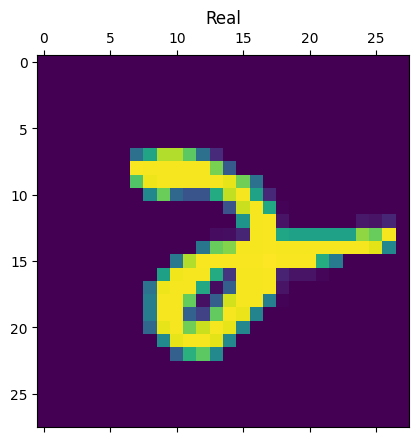

In [204]:
plt.matshow(a)
plt.title("Real")

## 4 TYPES OF EDGE FILTERS 

In [205]:
Top_edge_filter=[[-1,-1,-1],[1,1,1],[0,0,0]]
Bottom_edge_filter=[[0,0,0],[1,1,1],[-1,-1,-1]]
Left_edge_filter=[[-1,1,0],[-1,1,0],[-1,1,0]]
Right_edge_filter=[[0,1,-1],[0,1,-1],[0,1,-1]]

## 4 TYPES OF PREWITT FILTERS

In [206]:
Prewitt_top_filter=[[-1,-1,-1],[0,0,0],[1,1,1]]
Prewitt_bottom_filter=[[1,1,1],[0,0,0],[-1,-1,-1]]
Prewitt_left_filter=[[-1,0,1],[-1,0,1],[-1,0,1]]
Prewitt_right_filter=[[1,0,-1],[1,0,-1],[1,0,-1]]

## AFTER CONVOLUTION MATRIX SIZE

In [ ]:
output_size_row_column=28-3+1

In [208]:
Top_edge_matrix=[[0 for i in range(output_size_row_column)]
                    for j in range(output_size_row_column)]
Bottom_edge_matrix=[[0 for i in range(output_size_row_column)]
                       for j in range(output_size_row_column)]
Left_edge_matrix=[[0 for i in range(output_size_row_column)]
                     for j in range(output_size_row_column)]
Right_edge_matrix=[[0 for i in range(output_size_row_column)]
                      for j in range(output_size_row_column)]

In [209]:
Prewitt_top_matrix=[[0 for i in range(output_size_row_column)]
                       for j in range(output_size_row_column)]
Prewitt_bottom_matrix=[[0 for i in range(output_size_row_column)]
                       for j in range(output_size_row_column)]
Prewitt_left_matrix=[[0 for i in range(output_size_row_column)]
                       for j in range(output_size_row_column)]
Prewitt_right_matrix=[[0 for i in range(output_size_row_column)]
                       for j in range(output_size_row_column)]

## 4 TYPE OF EDGE FILTERING

In [210]:
for i in tqdm(range(2,28)):
    for j in tqdm(range(2,28)):
        Top_edge_matrix[i-2][j-2]=((Top_edge_filter[0][0]*a[i-2][j-2])+(Top_edge_filter[0][1]*a[i-2][j-1])+(Top_edge_filter[0][2]*a[i-2][j])+(Top_edge_filter[1][0]*a[i-1][j-2])+(Top_edge_filter[1][1]*a[i-1][j-1])+(Top_edge_filter[1][2]*a[i-1][j])+(Top_edge_filter[2][0]*a[i][j-2])+(Top_edge_filter[2][1]*a[i][j-1])+(Top_edge_filter[2][2]*a[i][j]))

for i in tqdm(range(2,28)):
    for j in tqdm(range(2,28)):
        Bottom_edge_matrix[i-2][j-2]=((Bottom_edge_filter[0][0]*a[i-2][j-2])+(Bottom_edge_filter[0][1]*a[i-2][j-1])+(Bottom_edge_filter[0][2]*a[i-2][j])+(Bottom_edge_filter[1][0]*a[i-1][j-2])+(Bottom_edge_filter[1][1]*a[i-1][j-1])+(Bottom_edge_filter[1][2]*a[i-1][j])+(Bottom_edge_filter[2][0]*a[i][j-2])+(Bottom_edge_filter[2][1]*a[i][j-1])+(Bottom_edge_filter[2][2]*a[i][j]))        
        
for i in tqdm(range(2,28)):
    for j in tqdm(range(2,28)):
        Left_edge_matrix[i-2][j-2]=((Left_edge_filter[0][0]*a[i-2][j-2])+(Left_edge_filter[0][1]*a[i-2][j-1])+(Left_edge_filter[0][2]*a[i-2][j])+(Left_edge_filter[1][0]*a[i-1][j-2])+(Left_edge_filter[1][1]*a[i-1][j-1])+(Left_edge_filter[1][2]*a[i-1][j])+(Left_edge_filter[2][0]*a[i][j-2])+(Left_edge_filter[2][1]*a[i][j-1])+(Left_edge_filter[2][2]*a[i][j]))        
        
for i in tqdm(range(2,28)):
    for j in tqdm(range(2,28)):
        Right_edge_matrix[i-2][j-2]=((Right_edge_filter[0][0]*a[i-2][j-2])+(Right_edge_filter[0][1]*a[i-2][j-1])+(Right_edge_filter[0][2]*a[i-2][j])+(Right_edge_filter[1][0]*a[i-1][j-2])+(Right_edge_filter[1][1]*a[i-1][j-1])+(Right_edge_filter[1][2]*a[i-1][j])+(Right_edge_filter[2][0]*a[i][j-2])+(Right_edge_filter[2][1]*a[i][j-1])+(Right_edge_filter[2][2]*a[i][j]))        

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26070.26it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26082.73it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 13035.13it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26076.50it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26020.50it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 13050.73it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26070.26it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26101.46it/s]

100%|███████████████████████████

## 4 TYPE OF PREWITT F

In [211]:
for i in tqdm(range(2,28)):
    for j in tqdm(range(2,28)):
        Prewitt_top_matrix[i-2][j-2]=((Prewitt_top_filter[0][0]*a[i-2][j-2])+(Prewitt_top_filter[0][1]*a[i-2][j-1])+(Prewitt_top_filter[0][2]*a[i-2][j])+(Prewitt_top_filter[1][0]*a[i-1][j-2])+(Prewitt_top_filter[1][1]*a[i-1][j-1])+(Prewitt_top_filter[1][2]*a[i-1][j])+(Prewitt_top_filter[2][0]*a[i][j-2])+(Prewitt_top_filter[2][1]*a[i][j-1])+(Prewitt_top_filter[2][2]*a[i][j]))
for i in tqdm(range(2,28)):
    for j in tqdm(range(2,28)):
        Prewitt_bottom_matrix[i-2][j-2]=((Prewitt_bottom_filter[0][0]*a[i-2][j-2])+(Prewitt_bottom_filter[0][1]*a[i-2][j-1])+(Prewitt_bottom_filter[0][2]*a[i-2][j])+(Prewitt_bottom_filter[1][0]*a[i-1][j-2])+(Prewitt_bottom_filter[1][1]*a[i-1][j-1])+(Prewitt_bottom_filter[1][2]*a[i-1][j])+(Prewitt_bottom_filter[2][0]*a[i][j-2])+(Prewitt_bottom_filter[2][1]*a[i][j-1])+(Prewitt_bottom_filter[2][2]*a[i][j]))
for i in tqdm(range(2,28)):
    for j in tqdm(range(2,28)):
        Prewitt_left_matrix[i-2][j-2]=((Prewitt_left_filter[0][0]*a[i-2][j-2])+(Prewitt_left_filter[0][1]*a[i-2][j-1])+(Prewitt_left_filter[0][2]*a[i-2][j])+(Prewitt_left_filter[1][0]*a[i-1][j-2])+(Prewitt_left_filter[1][1]*a[i-1][j-1])+(Prewitt_left_filter[1][2]*a[i-1][j])+(Prewitt_left_filter[2][0]*a[i][j-2])+(Prewitt_left_filter[2][1]*a[i][j-1])+(Prewitt_left_filter[2][2]*a[i][j]))
for i in tqdm(range(2,28)):
    for j in tqdm(range(2,28)):
        Prewitt_right_matrix[i-2][j-2]=((Prewitt_right_filter[0][0]*a[i-2][j-2])+(Prewitt_right_filter[0][1]*a[i-2][j-1])+(Prewitt_right_filter[0][2]*a[i-2][j])+(Prewitt_right_filter[1][0]*a[i-1][j-2])+(Prewitt_right_filter[1][1]*a[i-1][j-1])+(Prewitt_right_filter[1][2]*a[i-1][j])+(Prewitt_right_filter[2][0]*a[i][j-2])+(Prewitt_right_filter[2][1]*a[i][j-1])+(Prewitt_right_filter[2][2]*a[i][j]))

100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26008.09it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26070.26it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26120.22it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26145.27it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 13041.37it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26020.50it/s]

100%|███████████████████████████

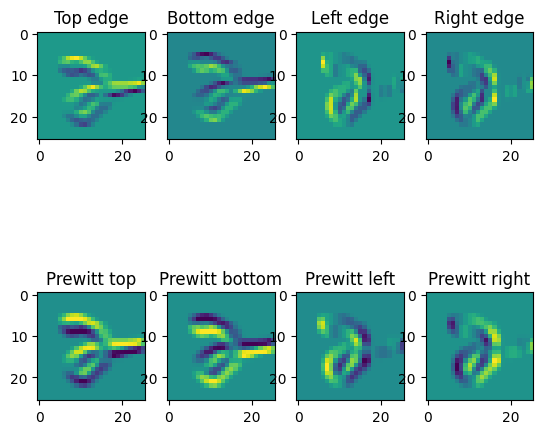

In [212]:
plt.subplot(3,4,1)
plt.imshow(Top_edge_matrix)
plt.title('Top edge')
plt.subplot(3,4,2)
plt.title('Bottom edge')
plt.imshow(Bottom_edge_matrix)
plt.subplot(3,4,3)
plt.title('Left edge')
plt.imshow(Left_edge_matrix)
plt.subplot(3,4,4)
plt.title('Right edge')
plt.imshow(Right_edge_matrix)
plt.subplot(3,4,9)
plt.title('Prewitt top')
plt.imshow(Prewitt_top_matrix)
plt.subplot(3,4,10)
plt.title('Prewitt bottom')
plt.imshow(Prewitt_bottom_matrix)
plt.subplot(3,4,11)
plt.title('Prewitt left')
plt.imshow(Prewitt_left_matrix)
plt.subplot(3,4,12)
plt.title('Prewitt right')
plt.imshow(Prewitt_right_matrix)
plt.show()